In [2]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df=pd.read_csv("IMDB Dataset (1).csv")

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [6]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub('<.*?>', '', text)  # remove HTML tags
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [9]:
df['clean_review'] = df['review'].apply(preprocess_text)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})

print(X.shape)

(50000, 5000)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
print(confusion_matrix(y_test, y_pred))

[[4340  621]
 [ 483 4556]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [15]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', LogisticRegression())
])
pipeline.fit(df['clean_review'][:40000], y[:40000])
preds = pipeline.predict(df['clean_review'][40000:])

In [16]:
print("Accuracy:", accuracy_score(y[40000:], preds))

Accuracy: 0.8839


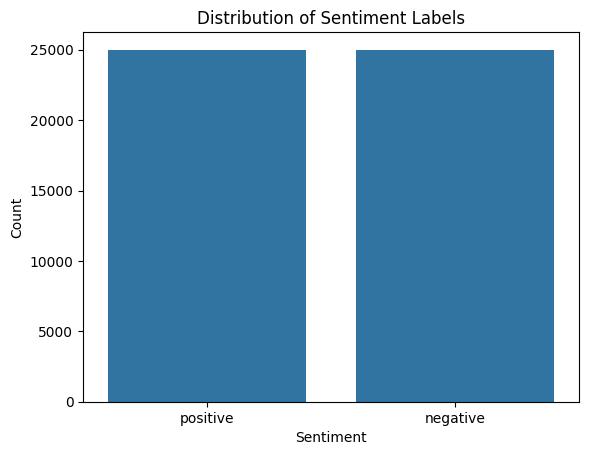

In [18]:
# Sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

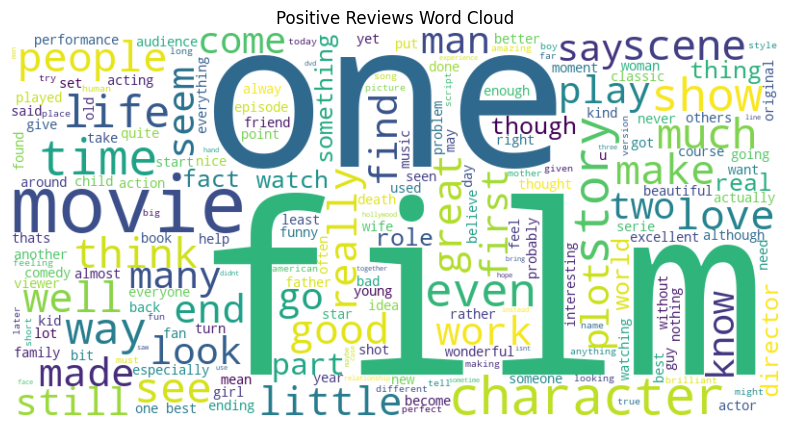

In [19]:
positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
plt.show()

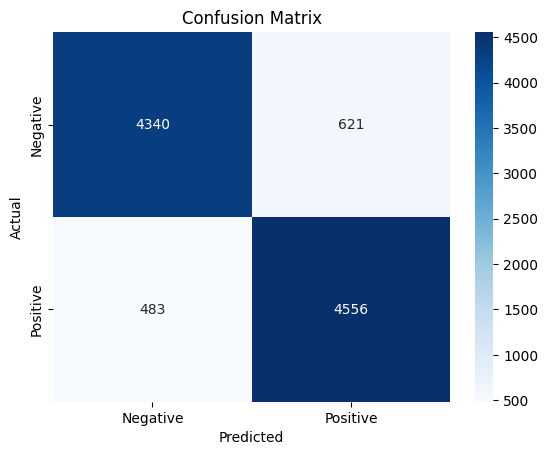

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
test_samples = df['review'][45000:45005]
true_labels = df['sentiment'][45000:45005]
predicted = pipeline.predict(test_samples)

for i in range(5):
    print(f"\nReview: {test_samples.iloc[i][:200]}...")
    print(f"Actual: {true_labels.iloc[i]} | Predicted: {'positive' if predicted[i] else 'negative'}")


Review: What I enjoyed most in this film was the scenery of Corfu, being Greek I adore my country and I liked the flattering director's point of view. Based on a true story during the years when Greece was st...
Actual: positive | Predicted: positive

Review: MacArthur is a great movie with a great story about a great manGeneral Douglas MacArthur. This is of course, the story of one of America's great military figures, and a figure made familiar to me fro...
Actual: positive | Predicted: positive

Review: What can I say? I ignored the reviews and went to see it myself. Damn the reviews were so right. What a waste of money considering it's budget.<br /><br />Good thing, I went to see Kill Bill after thi...
Actual: negative | Predicted: negative

Review: A pretty transparent attempt to wring cash out of the thriving British club scene, Sorted is a film that shows promise in certain departments, but does very little else. A perfunctory thriller plot (w...
Actual: negative | Predicted: n